# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VAEmodel import VAE
from jointvae.training_l import Trainer
from torch import optim
from viz.visualize_l import Visualizer
import matplotlib.pyplot as plt
import numpy as np
from disentanglement_lib.data.ground_truth import dsprites
from tensorflow import gfile

valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)
import torch
import numpy as np
import torch.utils.data as utils
from PIL import Image
#####trai
# DSPRITES_PATH = "/home/ISO/Pruned_VAE/data/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
# with gfile.Open(DSPRITES_PATH, "rb") as data_file:
#     # Data was saved originally using python2, so we need to set the encoding.
#     data = np.load(data_file, encoding="latin1", allow_pickle=True)
# print(data["imgs"].max(),data["imgs"].min())
# train_x = torch.tensor(data["imgs"][:649600,:,:]) # a list of numpy arrays
# train_y = torch.zeros((data["imgs"][:649600,:,:].shape[0],1)) # another list of numpy arrays (targets)
# train_set = utils.TensorDataset(train_x,train_y) # create your datset
# train_loader = utils.DataLoader(train_set, batch_size=64) # create your dataloader

# #####test
# test_x = torch.tensor(data["imgs"][649600:704000,:,:]) # a list of numpy arrays
# test_y = torch.zeros((data["imgs"][649600:704000,:,:].shape[0],1)) # another list of numpy arrays (targets)
# test_set = utils.TensorDataset(test_x,test_y) # create your datset
# test_loader = utils.DataLoader(test_set, batch_size=64) # create your dataloader

# #####valid
# valid_x = torch.tensor(data["imgs"][700000:,:,:]) # a list of numpy arrays
# valid_y = torch.zeros((data["imgs"][700000:,:,:].shape[0],1)) # another list of numpy arrays (targets)
# valid_set = utils.TensorDataset(valid_x,valid_y) # create your datset
# valid_loader = utils.DataLoader(valid_set, batch_size=64) # create your dataloader
# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 10
disc = []
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=1e-4

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 0
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="./Evaluations/".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList()
  (latent_to_features): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [3]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=50, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'modelVAE_params.pkl')
torch.save(model, './modelVAE')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
#32 2700

0/54000	Loss: 28.506
3200/54000	Loss: 28.447
6400/54000	Loss: 28.608
9600/54000	Loss: 28.364
12800/54000	Loss: 28.516
16000/54000	Loss: 28.531
19200/54000	Loss: 28.766
22400/54000	Loss: 28.537
25600/54000	Loss: 28.589
28800/54000	Loss: 28.523
32000/54000	Loss: 28.675
35200/54000	Loss: 28.652
38400/54000	Loss: 28.468
41600/54000	Loss: 28.724
44800/54000	Loss: 28.409
48000/54000	Loss: 28.794
51200/54000	Loss: 28.716
Valid Loss: 28.568, Recon Error: 0.016
28.568266138117362
Epoch: 1 Average loss: 28.60 Valid loss: 28.568266138117362	Recon Error:0.016
0/54000	Loss: 27.860
3200/54000	Loss: 28.604
6400/54000	Loss: 28.828
9600/54000	Loss: 28.749
12800/54000	Loss: 28.622
16000/54000	Loss: 28.758
19200/54000	Loss: 28.549
22400/54000	Loss: 28.603
25600/54000	Loss: 28.591
28800/54000	Loss: 28.337
32000/54000	Loss: 28.582
35200/54000	Loss: 28.431
38400/54000	Loss: 28.629
41600/54000	Loss: 28.610
44800/54000	Loss: 28.443
48000/54000	Loss: 28.391
51200/54000	Loss: 28.980
Valid Loss: 28.670, Recon Er

0/54000	Loss: 27.387
3200/54000	Loss: 28.308
6400/54000	Loss: 28.694
9600/54000	Loss: 28.650
12800/54000	Loss: 28.352
16000/54000	Loss: 28.604
19200/54000	Loss: 28.616
22400/54000	Loss: 28.790
25600/54000	Loss: 28.657
28800/54000	Loss: 28.470
32000/54000	Loss: 28.654
35200/54000	Loss: 28.617
38400/54000	Loss: 28.393
41600/54000	Loss: 28.947
44800/54000	Loss: 28.273
48000/54000	Loss: 28.523
51200/54000	Loss: 28.688
Valid Loss: 28.629, Recon Error: 0.017
28.628982483072484
Epoch: 16 Average loss: 28.60 Valid loss: 28.628982483072484	Recon Error:0.017
0/54000	Loss: 28.038
3200/54000	Loss: 28.753
6400/54000	Loss: 28.878
9600/54000	Loss: 28.645
12800/54000	Loss: 28.443
16000/54000	Loss: 28.634
19200/54000	Loss: 28.858
22400/54000	Loss: 28.526
25600/54000	Loss: 28.415
28800/54000	Loss: 28.399
32000/54000	Loss: 28.569
35200/54000	Loss: 28.664
38400/54000	Loss: 28.239
41600/54000	Loss: 28.514
44800/54000	Loss: 28.596
48000/54000	Loss: 28.763
51200/54000	Loss: 28.406
Valid Loss: 28.554, Recon E

0/54000	Loss: 29.732
3200/54000	Loss: 28.643
6400/54000	Loss: 28.417
9600/54000	Loss: 28.652
12800/54000	Loss: 28.402
16000/54000	Loss: 28.618
19200/54000	Loss: 28.475
22400/54000	Loss: 28.766
25600/54000	Loss: 28.466
28800/54000	Loss: 28.556
32000/54000	Loss: 28.919
35200/54000	Loss: 28.479
38400/54000	Loss: 28.396
41600/54000	Loss: 28.459
44800/54000	Loss: 28.618
48000/54000	Loss: 28.520
51200/54000	Loss: 28.382
Valid Loss: 28.651, Recon Error: 0.016
28.651284623653332
Epoch: 31 Average loss: 28.56 Valid loss: 28.651284623653332	Recon Error:0.016
0/54000	Loss: 28.181
3200/54000	Loss: 28.454
6400/54000	Loss: 28.681
9600/54000	Loss: 28.521
12800/54000	Loss: 28.541
16000/54000	Loss: 28.606
19200/54000	Loss: 28.676
22400/54000	Loss: 28.631
25600/54000	Loss: 28.549
28800/54000	Loss: 28.882
32000/54000	Loss: 28.759
35200/54000	Loss: 28.651
38400/54000	Loss: 28.589
41600/54000	Loss: 28.983
44800/54000	Loss: 28.275
48000/54000	Loss: 28.398
51200/54000	Loss: 28.401
Valid Loss: 28.621, Recon E

0/54000	Loss: 27.547
3200/54000	Loss: 28.483
6400/54000	Loss: 28.434
9600/54000	Loss: 28.626
12800/54000	Loss: 28.478
16000/54000	Loss: 28.535
19200/54000	Loss: 28.684
22400/54000	Loss: 28.367
25600/54000	Loss: 28.751
28800/54000	Loss: 28.656
32000/54000	Loss: 28.511
35200/54000	Loss: 28.967
38400/54000	Loss: 28.685
41600/54000	Loss: 28.615
44800/54000	Loss: 28.575
48000/54000	Loss: 28.574
51200/54000	Loss: 28.703
Valid Loss: 28.518, Recon Error: 0.018
28.517994556021183
Epoch: 46 Average loss: 28.61 Valid loss: 28.517994556021183	Recon Error:0.018
0/54000	Loss: 28.706
3200/54000	Loss: 28.563
6400/54000	Loss: 28.653
9600/54000	Loss: 28.599
12800/54000	Loss: 28.789
16000/54000	Loss: 28.513
19200/54000	Loss: 28.679
22400/54000	Loss: 28.634
25600/54000	Loss: 28.722
28800/54000	Loss: 28.443
32000/54000	Loss: 28.761
35200/54000	Loss: 28.578
38400/54000	Loss: 28.520
41600/54000	Loss: 28.485
44800/54000	Loss: 28.545
48000/54000	Loss: 28.555
51200/54000	Loss: 28.553
Valid Loss: 28.707, Recon E

In [ ]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('modelVAE_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

tensor(1.) tensor(0.)
(8, 8)
1.0


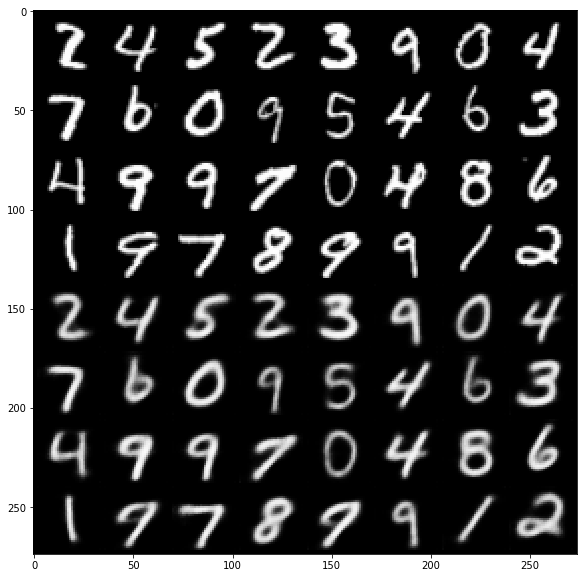

In [7]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    print(batch.max(),batch.min())
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [ ]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        #print(np.sum(cov**2) )
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)
#5  0.151924412721281 0.2451414419397427 Valid Loss: 22.523, Recon Error: 0.015
#10 0.8148840703782003 0.6103434196323346 Valid Loss: 22.451, Recon Error: 0.013
#16 3.8029583609028226 0.7439127556837288 Valid Loss: 22.461, Recon Error: 0.011
#32 10.0043337937373270.6838814971173645 Valid Loss: 22.624, Recon Error: 0.012
#64 1.16122169251655 0.7693685625389124 Valid Loss: 22.622, Recon Error: 0.012

In [ ]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

In [ ]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

In [ ]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

In [ ]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

In [ ]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

In [ ]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
   

In [ ]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [ ]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [ ]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)